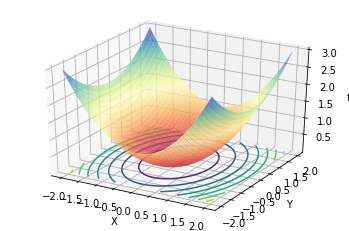

In [2]:
#Optimization ASsignment using the Monte CArlo and Gradient Methods
#Code: Rosalie Chaleunsouck

#importing necessary notebooks
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Defined x domain
x_min, x_max = -2, 2
#Defined y domain
y_min, y_max = -2, 2                          

#Function based on given equation
def f(x,y):
    return 1/2*x**2 + 1/4*y**2

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

#defining the grid
x,y = np.meshgrid(nx,ny)

#Plotting the function
z = f(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='Spectral', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()

In [6]:
#importing random number notebook
from random import random

#using the Monte Carlo Method
#we define the monte carlo using a random set of values for the initial minimum
def MC(N, f, x1, x2, y1, y2):
    Domain_x = x2 - x1  # x domain of x
    Domain_y = y2 - y1  # y domain of y
    min_x, min_y = Domain_x*random() + x_min, Domain_y*random() + y_min
    
    
#Redefine these random integers giving the new parameters in regards to a function
    for i in range(N):
        x = Domain_x*random() + x_min
        y = Domain_y*random() + y_min        
        if f(x, y) < f(min_x, min_y):
            min_x, min_y = x, y
    return min_x, min_y, f(min_x, min_y)


#findind the minimum values using the MC method and setting the domains of the minimums
x, y, minimum = MC(int(1e7), f, -2, 2, -2, 2)


#Print the calculated values
print("Minimum Values:")
print("Minimum x:", x)
print("Minimum y:", y)
print("Function Minimum:", minimum)

Minimum Values:
Minimum x: 0.0006874165496211226
Minimum y: 0.0003940372974122752
Function Minimum: 2.750871042844971e-07


In [10]:
#Now using the Gradient Method
def Gradient(f, P, d=0.001):
    #where C is the position in the coordinate system
    x, y = P[0], P[1]
    
    f_dx = (f(x+d, y)-f(x, y))/d
    f_dy = (f(x, y+d)-f(x, y))/d
    return np.array([f_dx, f_dy])


# Now we generate rando numbers for the dataset.
def Random(xmin, xmax, ymin, ymax):
    x = xmin + np.random.random()*(xmax-xmin)
    y = ymin + np.random.random()*(ymax-ymin)
    return [x, y]

#Applying the gradient decent method to the function
def Gradient_min(f, start, N=1000, d=0.001):
    
    C_now = start
    C_prev = None 
    converged = False
    C_hist = [] #defining the array for the dataset
    C_hist.append(C_now)
    
#for-loop and if-else statement
    for i in range(N):
        fx_now = Gradient(f, C_now, d)
        #x_next = x_now - derivative(f, x_now)*dx
        
        if C_prev is None:
            gamma = 0.01
            
        else:
            fx_prev = Gradient(f, C_prev)
            diff = fx_now - fx_prev
            
            gamma = np.dot(C_now - C_prev, dd) / (np.linalg.norm(dd))**2 
            coord_next = coord_now - gamma*df_now
            
            if f(C_next[0], C_next[1]) > f(C_now[0], C_now[1]):
                converged = True
                break
            else:
                C_prev = C_now
                C_now = C_next
                C_hist.append(C_now)
            
    return converged, np.array(C_hist), f(C_now[0], C_now[1])

#Defininf the minimum (fmin) with the domains
converged, C_hist, fmin = Gradient_min(f, Random(-2,2,-2,2))

#Printing the minimum value
print("Minimum Value:", fmin)

Minimum Value: 0.3322804151289899
